In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_rain.csv')
print(data.shape)
data.head()

(1648, 19)


,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1.31,1,1,1.0,0.09,0.0,0.0,92.0,66.0,79.0,76.0,60.116,8.05,1.40,0.0,0.0,90,66,78.0
1,1.05,1,1,0.5,1.15,0.0,0.0,43.0,37.0,40.0,43.0,41.396,8.95,0.10,0.0,0.0,44,35,39.5
2,0.00,1,1,1.5,0.07,0.0,0.0,62.0,43.0,52.5,47.0,44.978,4.03,0.07,0.0,0.0,59,43,51.0
3,1.29,1,1,7.5,0.27,0.0,0.0,60.0,54.0,57.0,57.0,63.644,7.16,1.56,0.0,0.0,72,57,64.5
4,0.06,1,1,0.0,0.07,2.0,4.0,26.0,9.0,17.5,18.0,36.194,11.86,0.01,0.6,3.1,26,9,17.5


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
X = data.drop(columns='target')
y = data['target']

In [5]:
X.shape

(1648, 18)

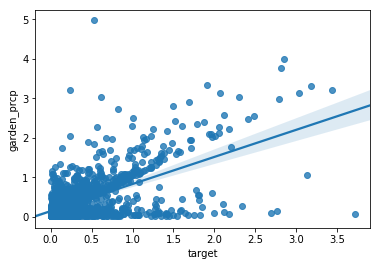

In [8]:
sns.regplot(data.target, data.garden_prcp)

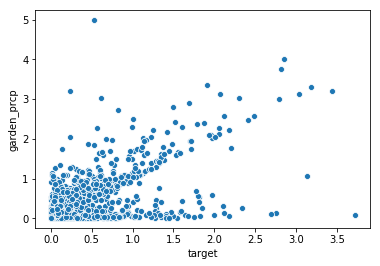

In [9]:
sns.scatterplot(data.target, data.garden_prcp)

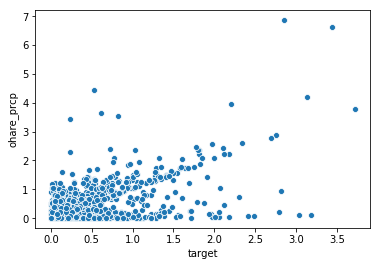

In [10]:
sns.scatterplot(data.target, data.ohare_prcp)

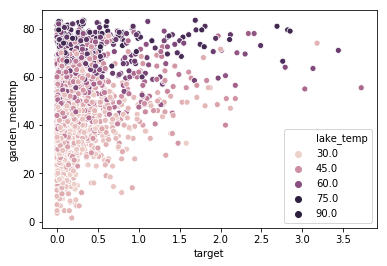

In [12]:
sns.scatterplot(data.target, data.garden_medtmp, data.lake_temp)

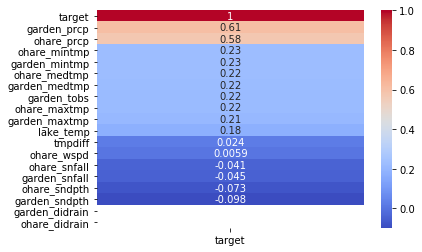

In [13]:
# this will generate a single column heatmap showing the correlations between the target and the remaining variables

# need a dataframe called data and a column called 'status'
corr = data.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm')

In [14]:
y.min()

0.0

In [15]:
y.max()

3.72

In [16]:
y.value_counts()

0.00    71
0.03    68
0.06    41
0.04    36
0.05    35
0.13    32
0.11    29
0.02    27
0.01    26
0.01    25
0.19    25
0.12    25
0.14    23
0.24    23
0.09    22
0.10    22
0.04    21
0.07    21
0.20    20
0.05    20
0.23    19
0.25    19
0.02    19
0.08    19
0.16    19
0.27    17
0.01    17
0.26    16
0.21    16
0.34    15
        ..
0.89     1
1.77     1
0.14     1
0.79     1
1.68     1
2.82     1
0.82     1
1.87     1
1.33     1
0.78     1
1.83     1
1.58     1
1.17     1
0.45     1
1.91     1
2.85     1
0.15     1
0.81     1
0.35     1
0.71     1
1.49     1
3.13     1
1.26     1
0.24     1
3.44     1
0.77     1
2.20     1
1.47     1
0.63     1
0.78     1
Name: target, Length: 315, dtype: int64

In [17]:
# generate a linear model
lm = LinearRegression()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
preds = lm.predict(X_train)
preds

array([0.28168899, 0.29596534, 0.23367626, ..., 0.16107237, 0.02267161,
       0.06422219])

In [21]:
def MSE(Y, Yhat):
    #calculate the difference between Y and Yhat
    diff = Y - Yhat
    # Square each element in diff
    squared_diff = np.square(diff)
    # Calculate the mean of squared_diff
    mse = np.mean(squared_diff)
    return mse

In [22]:
MSE(y_train, preds)

0.09880740095192526

In [23]:
lm.score(X_train, y_train)

0.5357611687238448

In [24]:
lm.score(X_test, y_test)

0.4128771959178896

In [25]:
preds = lm.predict(X_test)
preds

array([1.27525338e+00, 6.38689485e-01, 2.50723033e-01, 3.03148262e-01,
       5.47343632e-01, 4.17694202e-01, 3.29099382e-01, 2.99945321e-01,
       5.96237059e-01, 3.46697469e-01, 7.64926155e-02, 2.58574919e-01,
       1.82899718e-01, 1.37071736e-01, 1.56630422e+00, 1.68599327e-01,
       4.14303608e-01, 4.15079546e-01, 2.40867399e-01, 7.98434282e-01,
       1.99724038e-01, 6.56698004e-01, 1.95769618e-01, 7.91160571e-02,
       2.38722680e-01, 2.93074173e-01, 3.62040600e-01, 4.36228744e-01,
       9.25895589e-01, 3.16036265e-01, 1.40838536e-01, 3.31948131e-01,
       1.81080930e+00, 8.93959264e-02, 2.56359292e-01, 3.00349988e-01,
       4.56424147e-01, 2.61778086e-01, 9.40757659e-02, 2.18864956e-01,
       2.37552367e-01, 9.84612876e-02, 9.36833957e-02, 4.23086334e-01,
       1.29723669e-01, 3.43095459e-01, 1.25010246e-01, 1.95693674e-01,
       8.16005064e-01, 5.47134596e-01, 7.58347944e-01, 4.30789287e-01,
       3.70382798e-01, 9.29629882e-01, 1.04363579e-01, 6.05357064e-01,
      

In [26]:
MSE(y_test, preds)

0.12401051499127547

In [27]:
cross_val_score(lm, X_train, y_train, cv=3).mean()

0.5112498473830641

In [28]:
lm.intercept_

-0.037492025562221254

In [29]:
lm.coef_

array([ 0.00000000e+00, -9.06393016e-17,  3.23373995e-03,  4.18037849e-01,
       -6.02278995e-03,  1.62235188e-04,  1.57685210e-03, -2.22647832e-03,
       -3.24813106e-04, -3.35543888e-04,  1.31138191e-03, -1.02650424e-03,
        3.78210730e-01, -1.18558315e-02,  2.01672537e-03, -1.74688276e-03,
        3.06305693e-03,  6.58087089e-04])

In [30]:
X.columns

Index(['garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

In [31]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()



lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

print(f'LRM train: {lr.score(X_train_scaled, y_train)}')
print(f'LRM test: {lr.score(X_test_scaled, y_test)}')
print(f'percent difference relative to training data: { round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)}%' )
print()

print(f'Lasso train: {lasso.score(X_train_scaled, y_train)}')
print(f'Lasso test: {lasso.score(X_test_scaled, y_test)}')
print(f'percent difference relative to training data: { round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)}%' )
print()

print(f'Ridge train: {ridge.score(X_train_scaled, y_train)}')
print(f'Ridge test: {ridge.score(X_test_scaled, y_test)}')
print(f'percent difference relative to training data: { round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)}%' )

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


LRM train: 0.5357611687238448
LRM test: 0.41287719591788835
percent difference relative to training data: 22.936%

Lasso train: 0.0
Lasso test: -0.00297437911631393
percent difference relative to training data: 0.555%

Ridge train: 0.5357605098543312
Ridge test: 0.41313782621308254
percent difference relative to training data: 22.888%


,Model,train,test,percent_difference
1,Lasso,0.000000,-0.002974,0.555
2,Ridge,0.535761,0.413138,22.888
0,LRM,0.535761,0.412877,22.936


In [35]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.7,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)

# instantiate the models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# fith the models to the training data
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# apply each model to the test data and print out the results
print(f'LRM test: {lr.score(X_test_scaled, y_test)}')
print(f'Lasso test: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge tes: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    # this compares the model scores of the training vs the test data
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


LRM test: 0.40659057613045324
Lasso test: -7.073578980842932e-05
Ridge tes: 0.40686722982835494


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,Model,train,test,percent_difference
1,Lasso,0.000000,-0.000071,0.013
2,Ridge,0.541024,0.406867,24.797
0,LRM,0.541024,0.406591,24.848


In [37]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.7,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)

# instantiate the models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# fith the models to the training data
lr.fit(X_train, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# apply each model to the test data and print out the results
print(f'LRM test: {lr.score(X_test, y_test)}')
print(f'Lasso test: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge tes: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    # this compares the model scores of the training vs the test data
    'percent_difference': [round(100* (lr.score(X_train, y_train) - (lr.score(X_test, y_test)))/ lr.score(X_train, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


LRM test: 0.40657789961026486
Lasso test: -7.073578980842932e-05
Ridge tes: 0.40686722982835494


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,Model,train,test,percent_difference
1,Lasso,0.000000,-0.000071,-0.000
2,Ridge,0.541024,0.406867,-0.000
0,LRM,0.541037,0.406578,24.852


LRM test: 0.40657789961026486
Lasso test: -7.073578980842932e-05
Ridge tes: 0.40686722982835494


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,Model,train,test,percent_difference
1,Lasso,0.000000,-0.000071,-0.000
2,Ridge,0.541024,0.406867,-0.000
0,LRM,0.541037,0.406578,24.852


# Well fit Ridge model.  Although, it is heavily biased.

In [41]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


lr.fit(X_train, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

print(f'LRM: {lr.score(X_test, y_test)}')
print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    'percent_difference': [round(100* (lr.score(X_train, y_train) - (lr.score(X_test, y_test)))/ lr.score(X_train, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')



LRM: 0.5226083422829253
Lasso: -0.02274463168120011
Ridge: 0.5227064373222675


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,Model,train,test,percent_difference
1,Lasso,0.000000,-0.022745,-4.478
0,LRM,0.507078,0.522608,-3.063
2,Ridge,0.507078,0.522706,3.077


In [42]:
# The final output compares the model scores between the training and the test data

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

print(f'LRM: {lr.score(X_test_scaled, y_test)}')
print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge.score(X_test_scaled, y_test)))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')



LRM: 0.522608342282925
Lasso: -0.02274463168120011
Ridge: 0.5227064373222675


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,Model,train,test,percent_difference
2,Ridge,0.507078,0.522706,-3.082
0,LRM,0.507078,0.522608,-3.063
1,Lasso,0.000000,-0.022745,4.485


In [44]:
# The final output compares the 

# import warnings
# warnings.filterwarnings('ignore')

#
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


print('k = 5 folds cross-val on a train set that has 80-20 train/test split')
print()


# The LRM Model
lr.fit(X_train_scaled, y_train)
lr_cross_val = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5).mean()

print(f'LRM: {lr.score(X_test_scaled, y_test)}')
print(f'cross val: {lr_cross_val}')
print()


# The Ridge Model
lasso.fit(X_train_scaled, y_train)
lasso_cross_val = cross_val_score(Lasso(), X_train_scaled, y_train, cv=5).mean()

print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'cross val: {lasso_cross_val}')
print()


# The Lasso Model
ridge.fit(X_train_scaled, y_train)
ridge_cross_val = cross_val_score(Ridge(), X_train_scaled, y_train, cv=5).mean()

print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
print(f'cross val: {ridge_cross_val}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
    'cross-val' :         [lr_cross_val,
                           lasso_cross_val,
                           ridge_cross_val],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'cross-val', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


k = 5 folds cross-val on a train set that has 80-20 train/test split

LRM: 0.522608342282925
cross val: 0.4640265787619054

Lasso: -0.02274463168120011
cross val: -0.005259225851750804

Ridge: 0.5227064373222675
cross val: 0.4640398205844651


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


,Model,train,test,cross-val,percent_difference
1,Lasso,0.000000,-0.022745,-0.005259,1.037
2,Ridge,0.507078,0.522706,0.464040,8.487
0,LRM,0.507078,0.522608,0.464027,8.490


In [45]:
for i in range(5, 11):
    # import warnings
    # warnings.filterwarnings('ignore')
    
    # fit the different models
    lr = LinearRegression()
    ridge = Ridge()
    lasso = Lasso()

# train/test split with 80-20 split
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        train_size = 0.90,
                                                        random_state = 42)
# standard scale fitted to X_train
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)

    X_test_scaled = ss.transform(X_test)

    print()
    print(f'k = {i} folds cross-val on a train set that has 80-20 train/test split')
    


    # The LRM Model
    lr_cross_val = cross_val_score(lr, X_train_scaled, y_train, cv=i).mean()
    lr.fit(X_train_scaled, y_train)

#     print(f'LRM: {lr.score(X_test_scaled, y_test)}')
#     print(f'cross val: {lr_cross_val}')
#     print()


    # The Ridge Model
    lasso_cross_val = cross_val_score(lasso, X_train_scaled, y_train, cv=i).mean()
    lasso.fit(X_train_scaled, y_train)

#     print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
#     print(f'cross val: {lasso_cross_val}')
#     print()


    # The Lasso Model
    ridge_cross_val = cross_val_score(ridge, X_train_scaled, y_train, cv=i).mean()
    ridge.fit(X_train_scaled, y_train)

#     print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
#     print(f'cross val: {ridge_cross_val}')

    data_dict = {
        'Model' :             ['LRM', 'Lasso', 'Ridge'],

        'train' :             [lr.score(X_train_scaled, y_train), 
                               lasso.score(X_train_scaled, y_train), 
                               ridge.score(X_train_scaled, y_train)],

         'test' :             [lr.score(X_test_scaled, y_test),  
                               lasso.score(X_test_scaled, y_test), 
                               ridge.score(X_test_scaled, y_test)],
        
        'cross_val' :         [lr_cross_val,
                               lasso_cross_val,
                               ridge_cross_val],

        'train-cross_val_%': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                                     round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                                     round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)],
      
        'test-cross_val_%': [round(100* (lr.score(X_test_scaled, y_test) - (lr_cross_val))/ lr.score(X_test_scaled, y_test), 3),
                                     round(100* (lasso.score(X_test_scaled, y_test) - (lasso_cross_val))/ lr.score(X_test_scaled, y_test), 3),
                                     round(100* (ridge.score(X_test_scaled, y_test) - (ridge_cross_val))/ lr.score(X_test_scaled, y_test), 3)],
       
        'train-test_%': [round(100* (lr.score(X_train_scaled, y_train) - lr.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3),
                                    round(100* (lasso.score(X_train_scaled, y_train) - lasso.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3),
                                    round(100* (ridge.score(X_train_scaled, y_train) - ridge.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3)]
    }

    train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'cross_val', 'train-cross_val_%', 'test-cross_val_%', 'train-test_%'])
    train_fit_test.sort_values('train-test_%')
    print(train_fit_test)


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always comple


k = 5 folds cross-val on a train set that has 80-20 train/test split
   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.507078  0.522608   0.464027              8.490            11.209   
1  Lasso  0.000000 -0.022745  -0.005259              1.037            -3.346   
2  Ridge  0.507078  0.522706   0.464040              8.487            11.226   

   train-test_%  
0        -3.063  
1         4.485  
2        -3.082  

k = 6 folds cross-val on a train set that has 80-20 train/test split
   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.507078  0.522608   0.462317              8.827            11.537   
1  Lasso  0.000000 -0.022745  -0.006120              1.207            -3.181   
2  Ridge  0.507078  0.522706   0.462411              8.809            11.537   

   train-test_%  
0        -3.063  
1         4.485  
2        -3.082  

k = 7 folds cross-val on a train set that has 80-20 train/test split
   M

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always comple

   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.507078  0.522608   0.478122              5.710             8.512   
1  Lasso  0.000000 -0.022745  -0.006243              1.231            -3.158   
2  Ridge  0.507078  0.522706   0.478198              5.695             8.517   

   train-test_%  
0        -3.063  
1         4.485  
2        -3.082  

k = 9 folds cross-val on a train set that has 80-20 train/test split
   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.507078  0.522608   0.473721              6.578             9.355   
1  Lasso  0.000000 -0.022745  -0.006839              1.349            -3.043   
2  Ridge  0.507078  0.522706   0.473857              6.551             9.347   

   train-test_%  
0        -3.063  
1         4.485  
2        -3.082  

k = 10 folds cross-val on a train set that has 80-20 train/test split


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always comple

   Model     train      test  cross_val  train-cross_val_%  test-cross_val_%  \
0    LRM  0.507078  0.522608   0.467305              7.844            10.582   
1  Lasso  0.000000 -0.022745  -0.009008              1.777            -2.628   
2  Ridge  0.507078  0.522706   0.467348              7.835            10.593   

   train-test_%  
0        -3.063  
1         4.485  
2        -3.082  


In [47]:
# import warnings
# warnings.filterwarnings('ignore')

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = 0.9,
                                                    random_state = 42)
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_test_scaled = ss.transform(X_test)


print('k = 5 folds cross-val on a train set that has 80-20 train/test split')
print()


# The LRM Model
lr.fit(X_train_scaled, y_train)
lr_cross_val = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5).mean()

print(f'LRM: {lr.score(X_test_scaled, y_test)}')
print(f'cross val: {lr_cross_val}')
print()


# The Ridge Model
lasso.fit(X_train_scaled, y_train)
lasso_cross_val = cross_val_score(Lasso(), X_train_scaled, y_train, cv=5).mean()

print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
print(f'cross val: {lasso_cross_val}')
print()


# The Lasso Model
ridge.fit(X_train_scaled, y_train)
ridge_cross_val = cross_val_score(Ridge(), X_train_scaled, y_train, cv=5).mean()

print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
print(f'cross val: {ridge_cross_val}')

data_dict = {
    'Model' :             ['LRM', 'Lasso', 'Ridge'],
           
    'train' :             [lr.score(X_train_scaled, y_train), 
                           lasso.score(X_train_scaled, y_train), 
                           ridge.score(X_train_scaled, y_train)],
    
     'test' :             [lr.score(X_test_scaled, y_test),  
                           lasso.score(X_test_scaled, y_test), 
                           ridge.score(X_test_scaled, y_test)],
    'cross-val' :         [lr_cross_val,
                           lasso_cross_val,
                           ridge_cross_val],
   
    'percent_difference': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
                           round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)]
}

train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'percent_difference'])
train_fit_test.sort_values('percent_difference')


k = 5 folds cross-val on a train set that has 80-20 train/test split

LRM: 0.522608342282925
cross val: 0.4640265787619054

Lasso: -0.02274463168120011
cross val: -0.005259225851750804

Ridge: 0.5227064373222675
cross val: 0.4640398205844651


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,Model,train,test,percent_difference
1,Lasso,0.000000,-0.022745,1.037
2,Ridge,0.507078,0.522706,8.487
0,LRM,0.507078,0.522608,8.490


In [61]:
# Train/test split R-SQUARED ONLY

def opt_r2_split(features_data, target, perc_to_train):
    
    import warnings
    warnings.filterwarnings('ignore')
    
    # code copied from stack overflow, and will be used to generate a run time of the functions below. 
    import time
    start_time = time.time()
    
    
    X = features_data
    y = target
    lst_to_optimize = []
    cross_val_optimization = []
    
    for k in range(1, len(X.columns)+1): # eventually will be len(X)

        index = itertools.combinations(list(X.columns), k)
        
        for col_combination in index:
    
            # instantiate models
            lr = LinearRegression()
            ridge = RidgeCV()
            lasso = LassoCV(cv=5)
            
            # split the data using train/test
            X_train, X_test, y_train, y_test = train_test_split(X[list(col_combination)], 
                                                                y,
                                                                train_size = perc_to_train,
                                                                random_state = 42)
    
            # put a standard scale on the plit data
            ss = StandardScaler()
            ss.fit(X_train)
            X_train_scaled = ss.transform(X_train)

            X_test_scaled = ss.transform(X_test)

            
            # cross-val calculations for each model
            lr_cross_val = cross_val_score(lr, X_train_scaled, y_train, cv=6).mean()
            lasso_cross_val = cross_val_score(lasso, X_train_scaled, y_train, cv=6).mean()
            ridge_cross_val = cross_val_score(ridge, X_train_scaled, y_train, cv=6).mean()

            # fit our models with the training data
            lr.fit(X_train_scaled, y_train)
            lasso.fit(X_train_scaled, y_train)
            ridge.fit(X_train_scaled, y_train)
            
            # build a list of maximums that includes a single maximum from each pass through the loop
            lst_to_optimize.append(max( lr.score(X_test_scaled, y_test),
                                        lasso.score(X_test_scaled, y_test),
                                        ridge.score(X_test_scaled, y_test)
                                        ))
            cross_val_optimization.append(min(abs(round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3)),
                                             abs(round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3)),
                                             abs(round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3))
                                             ))
            
    print(f'total number of features in the combination of greatest length = {k}')
    print(f'The maximum R-squared score using train/test split: {max(lst_to_optimize)}')
    print(f'The minimum absolute percentage difference between the fit train data and the cross-val score is: {min(cross_val_optimization)}')
    return f'Run time: {round(time.time() - start_time, 2)} seconds'

# for i in range(5, 11):
#     # import warnings
#     # warnings.filterwarnings('ignore')
    
#     # fit the different models
#     lr = LinearRegression()
#     ridge = Ridge()
#     lasso = Lasso()

# # train/test split with 80-20 split
#     X_train, X_test, y_train, y_test = train_test_split(X[['CRIM', 'AGE', 'TAX', 'LSTAT']], 
#                                                         y,
#                                                         train_size = 0.80,
#                                                         random_state = 42)
# # standard scale fitted to X_train
#     ss = StandardScaler()
#     ss.fit(X_train)
#     X_train_scaled = ss.transform(X_train)

#     X_test_scaled = ss.transform(X_test)

#     print()
#     print(f'k = {i} folds cross-val on a train set that has 80-20 train/test split')
    


#     # The LRM Model
#     lr_cross_val = cross_val_score(lr, X_train_scaled, y_train, cv=i).mean()
#     lr.fit(X_train_scaled, y_train)

# #     print(f'LRM: {lr.score(X_test_scaled, y_test)}')
# #     print(f'cross val: {lr_cross_val}')
# #     print()


#     # The Ridge Model
#     lasso_cross_val = cross_val_score(lasso, X_train_scaled, y_train, cv=i).mean()
#     lasso.fit(X_train_scaled, y_train)

# #     print(f'Lasso: {lasso.score(X_test_scaled, y_test)}')
# #     print(f'cross val: {lasso_cross_val}')
# #     print()


#     # The Lasso Model
#     ridge_cross_val = cross_val_score(ridge, X_train_scaled, y_train, cv=i).mean()
#     ridge.fit(X_train_scaled, y_train)

# #     print(f'Ridge: {ridge.score(X_test_scaled, y_test)}')
# #     print(f'cross val: {ridge_cross_val}')

#     data_dict = {
#         'Model' :             ['LRM', 'Lasso', 'Ridge'],

#         'train' :             [lr.score(X_train_scaled, y_train), 
#                                lasso.score(X_train_scaled, y_train), 
#                                ridge.score(X_train_scaled, y_train)],

#          'test' :             [lr.score(X_test_scaled, y_test),  
#                                lasso.score(X_test_scaled, y_test), 
#                                ridge.score(X_test_scaled, y_test)],
        
#         'cross_val' :         [lr_cross_val,
#                                lasso_cross_val,
#                                ridge_cross_val],

#         'train-cross_val_%': [round(100* (lr.score(X_train_scaled, y_train) - (lr_cross_val))/ lr.score(X_train_scaled, y_train), 3),
#                                      round(100* (lasso.score(X_train_scaled, y_train) - (lasso_cross_val))/ lr.score(X_train_scaled, y_train), 3),
#                                      round(100* (ridge.score(X_train_scaled, y_train) - (ridge_cross_val))/ lr.score(X_train_scaled, y_train), 3)],
      
#         'test-cross_val_%': [round(100* (lr.score(X_test_scaled, y_test) - (lr_cross_val))/ lr.score(X_test_scaled, y_test), 3),
#                                      round(100* (lasso.score(X_test_scaled, y_test) - (lasso_cross_val))/ lr.score(X_test_scaled, y_test), 3),
#                                      round(100* (ridge.score(X_test_scaled, y_test) - (ridge_cross_val))/ lr.score(X_test_scaled, y_test), 3)],
       
#         'train-test_%': [round(100* (lr.score(X_train_scaled, y_train) - lr.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3),
#                                     round(100* (lasso.score(X_train_scaled, y_train) - lasso.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3),
#                                     round(100* (ridge.score(X_train_scaled, y_train) - ridge.score(X_test_scaled, y_test))/ lr.score(X_train_scaled, y_train), 3)]
#     }

#     train_fit_test = pd.DataFrame(data = data_dict, columns=['Model', 'train', 'test', 'cross_val', 'train-cross_val_%', 'test-cross_val_%', 'train-test_%'])
#     train_fit_test.sort_values('train-test_%')
#     print(train_fit_test)


In [62]:
import itertools

In [63]:
from sklearn.linear_model import RidgeCV, LassoCV


In [ ]:
opt_r2_split(X, y, 80)